# Anaylyze distribution of circadian scores

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in processed CircaDB data 
circa_db = pd.read_csv('data/circa_db_mapped.tsv', sep = '\t')
circa_db.head(2)

,gene_id,Fat SQ_fdr,Fat Visceral_fdr,Aorta_fdr,Artery Coronary_fdr,Artery Tibial_fdr,Colon_fdr,Esophagus_fdr,Heart Atrial_fdr,Liver_fdr,...,Artery Coronary_exp,Artery Tibial_exp,Colon_exp,Esophagus_exp,Heart Atrial_exp,Liver_exp,Lung_exp,Nerve Tibial_exp,Pituitary_exp,Thyroid_exp
0,653635,0.6432,0.1526,0.8443,0.7712,0.9549,0.5059,0.2928,0.6953,0.9732,...,12.30,11.590,12.7200,12.3033,5.369,5.406,13.680,19.48,15.840,19.2550
1,79854,0.7652,0.2412,0.0473,0.0002,0.6314,0.8602,0.0820,0.6481,0.6405,...,5.94,8.419,5.4407,4.6607,2.962,3.240,7.024,12.11,9.898,9.7615


In [3]:
# Obtain name of all tissues in CircaDB
circa_db_cols = list(circa_db.columns)
circa_db_col_len = len(circa_db_cols)

all_tissues = []
for i in range(0, circa_db_col_len):
    s = circa_db_cols[i].split('_fdr')
    if len(s) == 2:
        all_tissues.append(s[0])
all_tissue_len = len(all_tissues)
all_tissues

['Fat SQ',
 'Fat Visceral',
 'Aorta',
 'Artery Coronary',
 'Artery Tibial',
 'Colon',
 'Esophagus',
 'Heart Atrial',
 'Liver',
 'Lung',
 'Nerve Tibial',
 'Pituitary',
 'Thyroid']

### Plot distribution of circadian scores by tissue

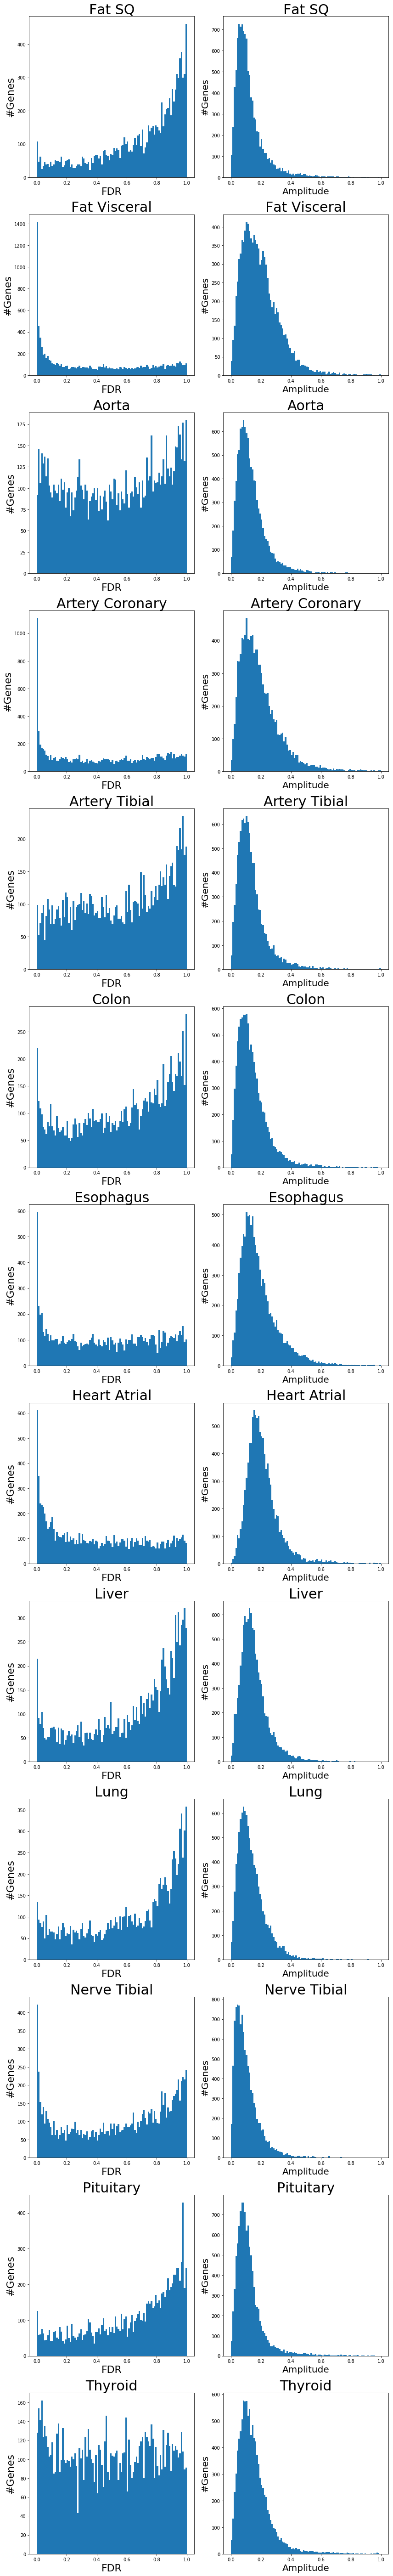

In [4]:
plt.figure(figsize = (12,all_tissue_len*6))

for i in range(0,all_tissue_len):
    tissue_type = all_tissues[i]
    
    # FDR
    ax = plt.subplot(all_tissue_len, 2, 2*i+1)
    tissue_col_name = tissue_type + '_fdr'
    axh = ax.hist(circa_db.loc[:,tissue_col_name], bins = 100, range = (0,1))
    ax.set_title(tissue_type, size = 30)
    ax.set_xlabel('FDR', size = 22)
    ax.set_ylabel('#Genes', size= 22)

    # amplitude
    ax = plt.subplot(all_tissue_len, 2, 2*i+2)
    tissue_col_name = tissue_type + '_amp'
    axh = ax.hist(circa_db.loc[:,tissue_col_name], bins = 100, range = (0,1))
    ax.set_title(tissue_type, size = 30)
    ax.set_xlabel('Amplitude', size = 20)
    ax.set_ylabel('#Genes', size= 20)

plt.tight_layout()
plt.savefig('plot/circa_db_tissue_scores.pdf')
plt.show()

### Pairwise comparison between FDR, amplitude, and expression

/home/yunhao1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/home/yunhao1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/home/yunhao1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


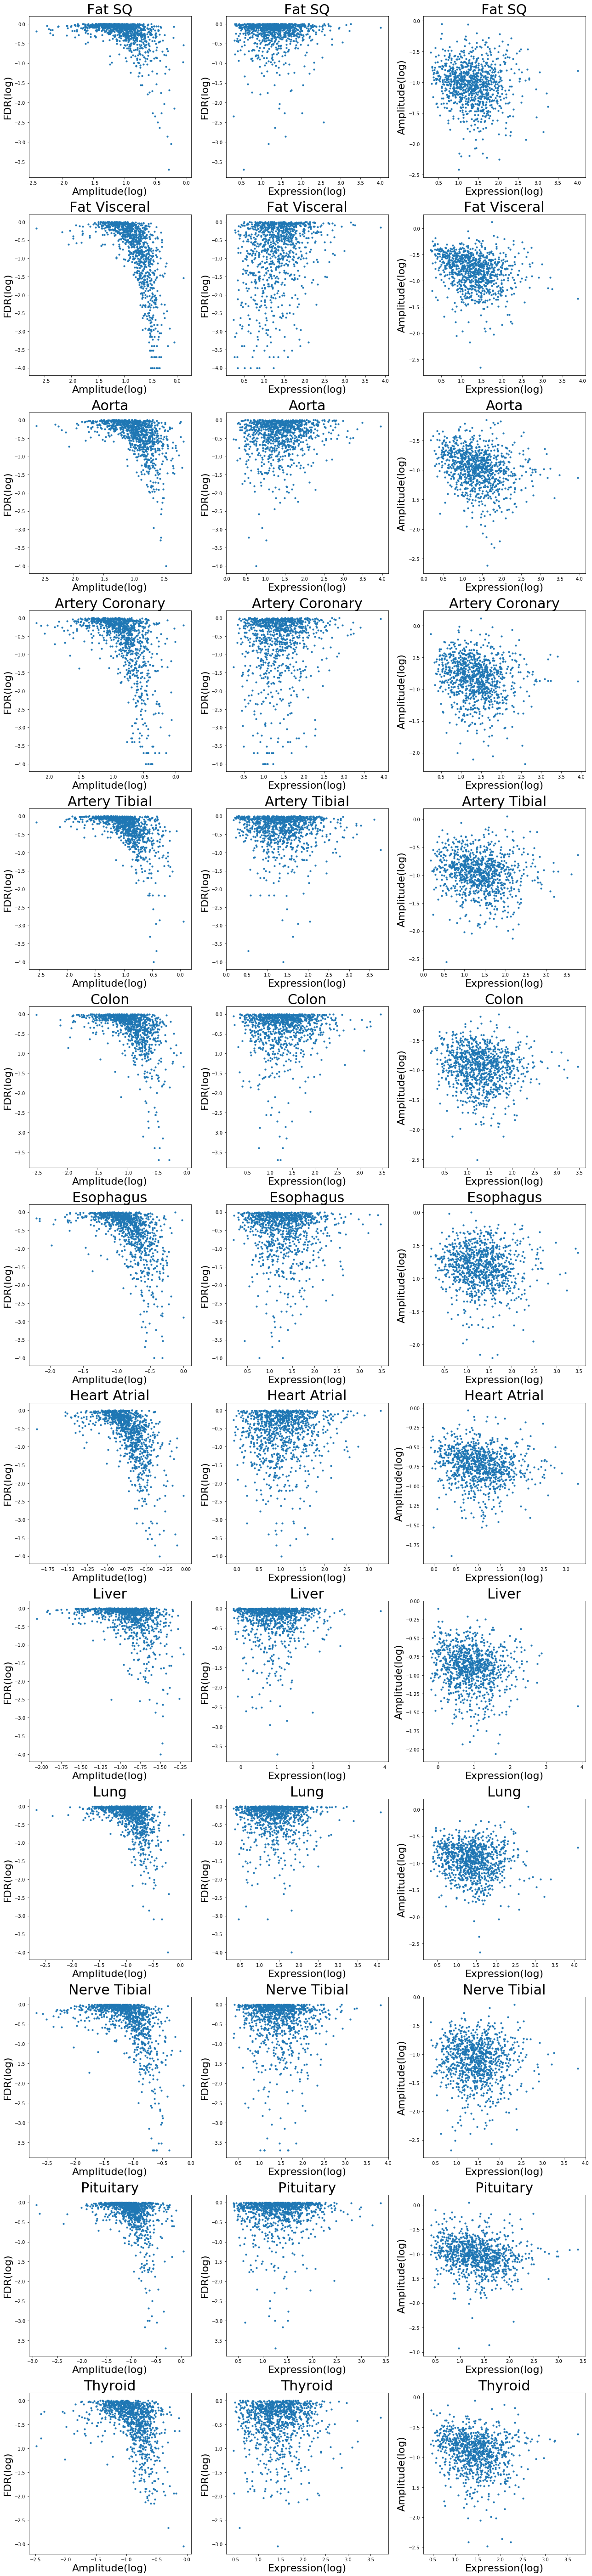

In [5]:
# Randomly select 1000 genes for score comparison 
circa_db_sub = circa_db.sample(n = 1000, axis = 0)

# plot
plt.figure(figsize = (18,all_tissue_len*6))

for i in range(0,all_tissue_len):
    tissue_type = all_tissues[i]
    
    # FDR ~ amplitude
    ax = plt.subplot(all_tissue_len, 3, i*3+1)
    x_col = tissue_type + '_amp'
    y_col = tissue_type + '_fdr'
    ax.scatter(np.log10(circa_db_sub.loc[:,x_col]), np.log10(circa_db_sub.loc[:,y_col]), s = 10)
    ax.set_title(tissue_type, size = 30)
    ax.set_xlabel('Amplitude(log)', size = 22)
    ax.set_ylabel('FDR(log)', size= 22)
    
    # FDR ~ expression 
    ax = plt.subplot(all_tissue_len, 3, i*3+2)
    x_col = tissue_type + '_exp'
    y_col = tissue_type + '_fdr'
    ax.scatter(np.log10(circa_db_sub.loc[:,x_col]), np.log10(circa_db_sub.loc[:,y_col]), s = 10)
    ax.set_title(tissue_type, size = 30)
    ax.set_xlabel('Expression(log)', size = 22)
    ax.set_ylabel('FDR(log)', size= 22)
    
    # amplitude ~ expression
    ax = plt.subplot(all_tissue_len, 3, i*3+3)
    x_col = tissue_type + '_exp'
    y_col = tissue_type + '_amp'   
    ax.scatter(np.log10(circa_db_sub.loc[:,x_col]), np.log10(circa_db_sub.loc[:,y_col]), s = 10)
    ax.set_title(tissue_type, size = 30)
    ax.set_xlabel('Expression(log)', size = 22)
    ax.set_ylabel('Amplitude(log)', size= 22)

plt.tight_layout()
plt.savefig('plot/circa_db_mapped_compare.pdf')
plt.show()

Negative correlation between FDR and amplitude. No correlation between expression and FDR/amplitude.

### Pairwise comparison between tissues

<Figure size 5616x5616 with 0 Axes>

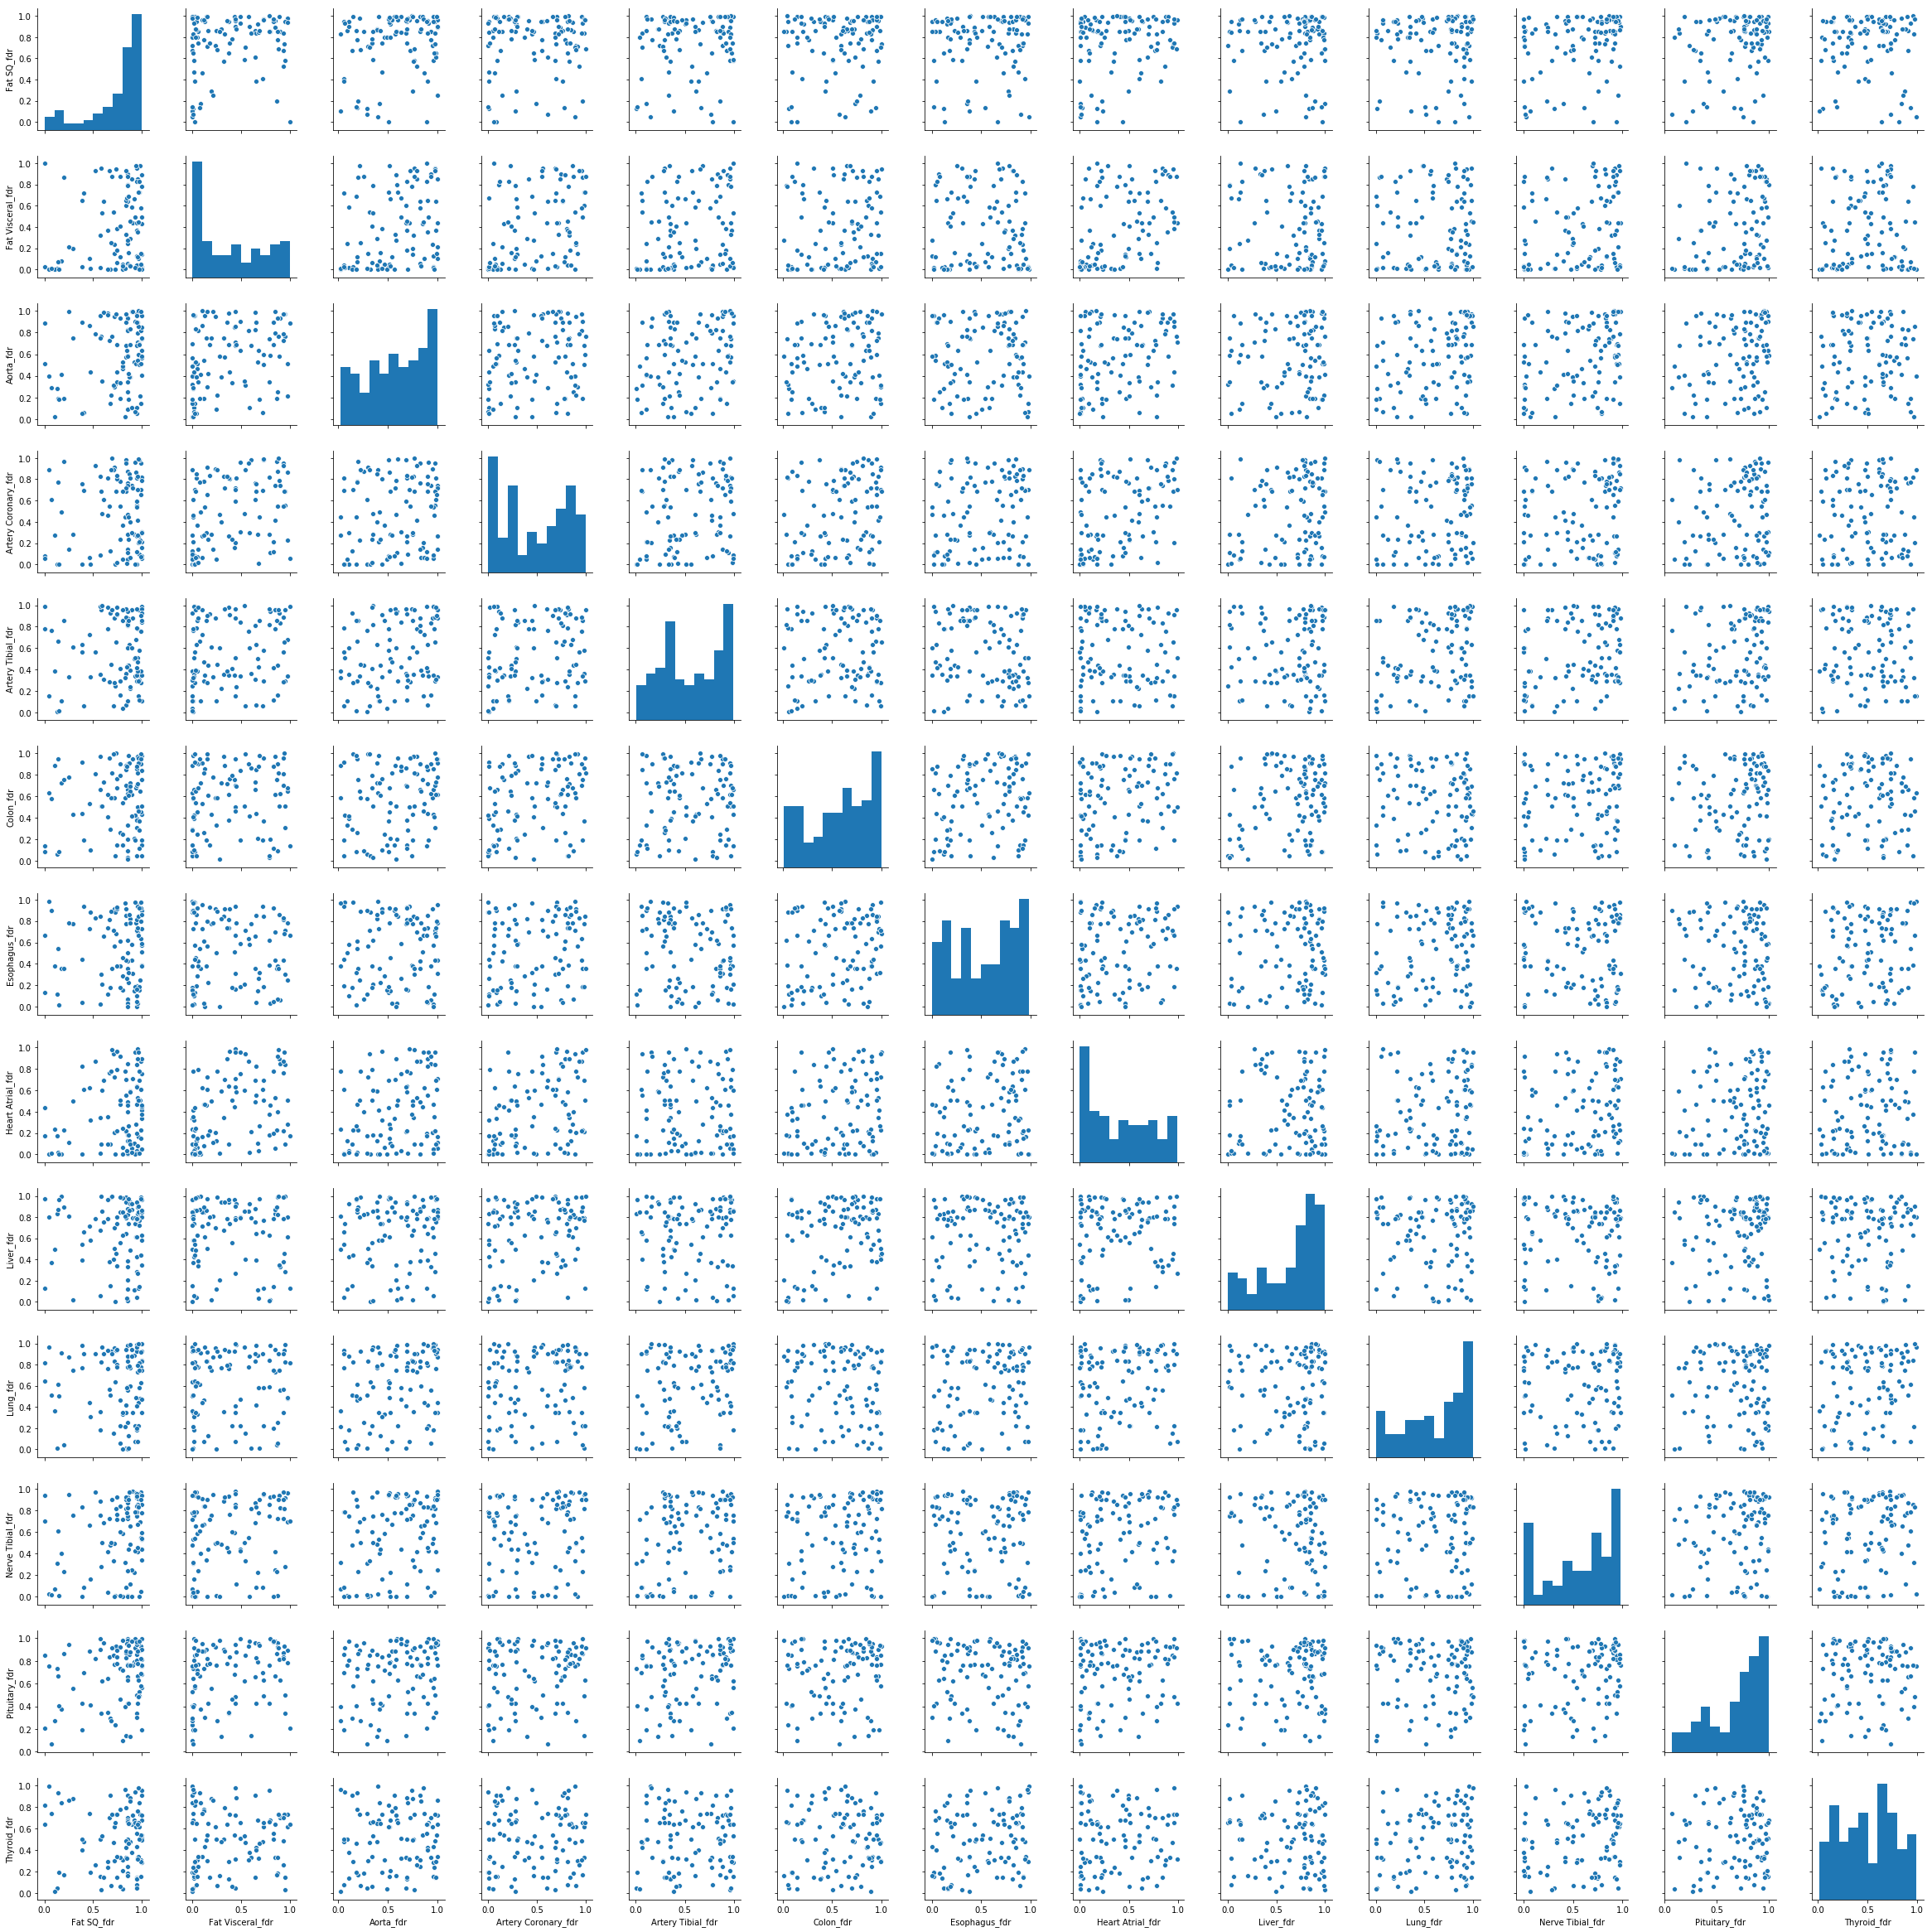

<Figure size 5616x5616 with 0 Axes>

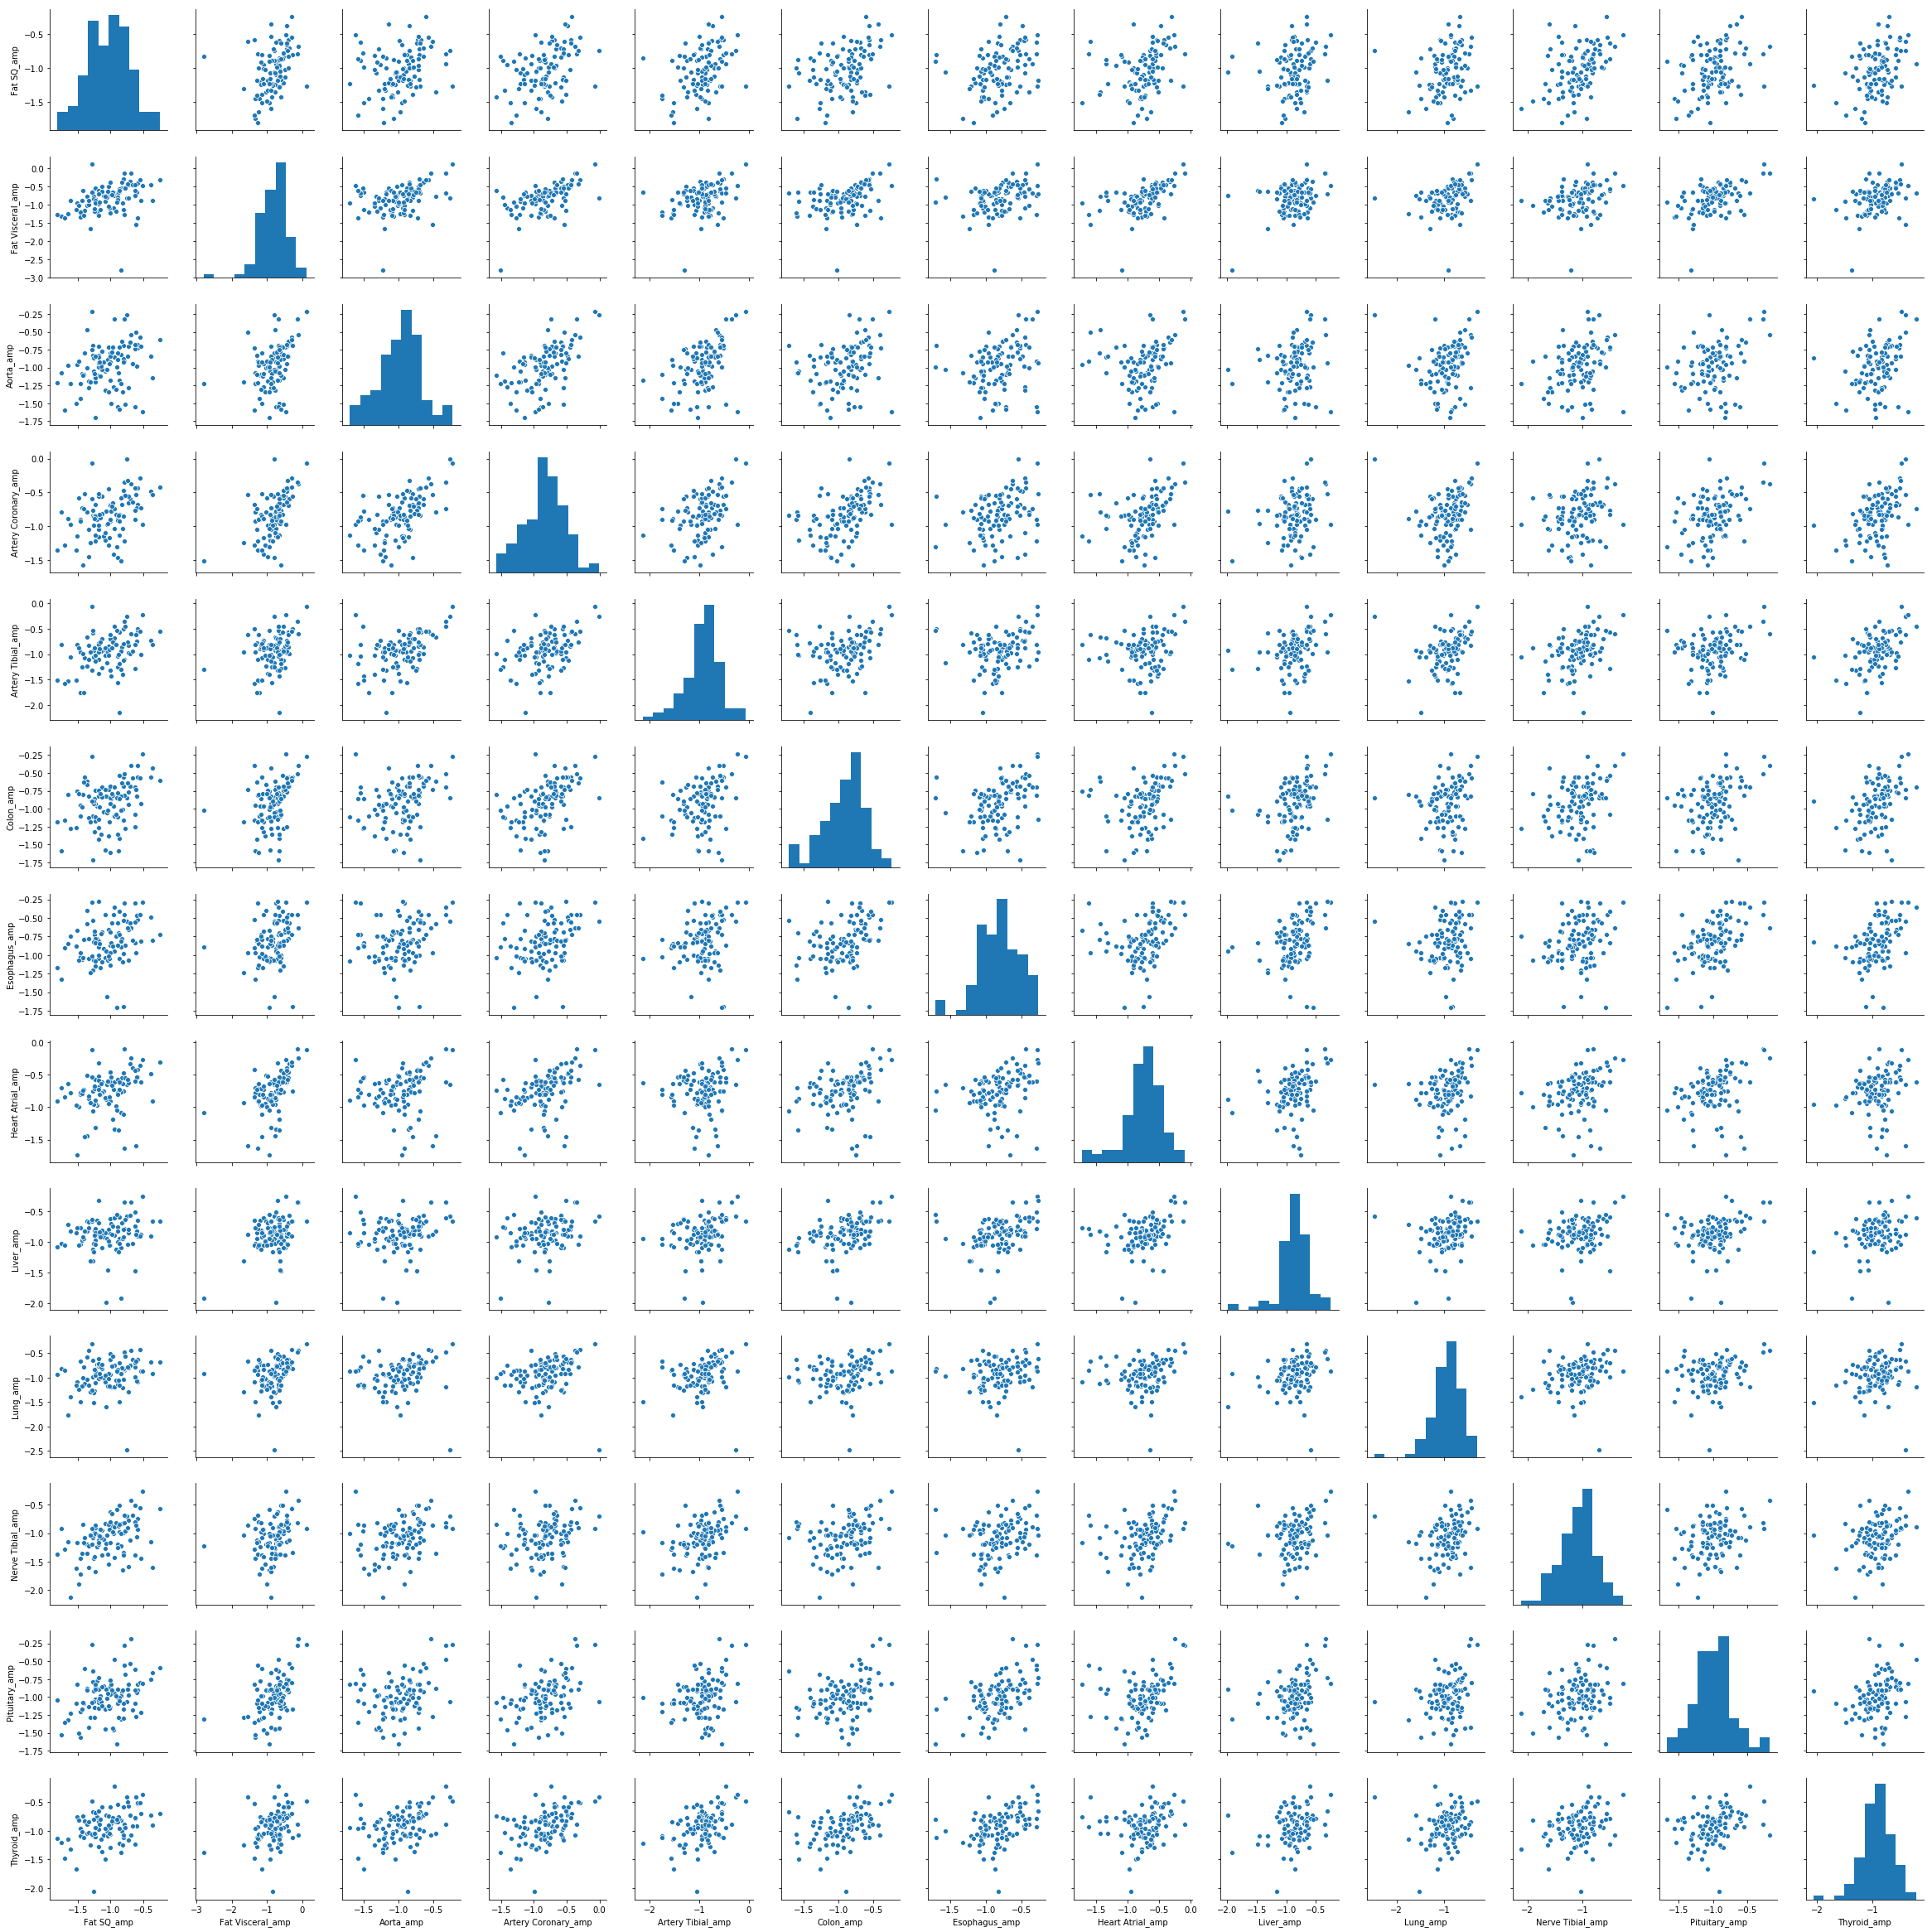

In [6]:
# Randomly select 100 genes for score comparison 
circa_db_sub = circa_db.sample(n = 100, axis = 0)

# Pairwise comparison of FDR between tissues
plt.figure(figsize = (all_tissue_len*6, all_tissue_len*6))
fdr_cols = [x + '_fdr' for x in all_tissues]
g = sns.pairplot(circa_db_sub.loc[:,fdr_cols])
plt.tight_layout()
plt.savefig('plot/circa_db_fdr_compare.pdf')

# Pairwise comparison of amplitude(log) between tissues
plt.figure(figsize = (all_tissue_len*6, all_tissue_len*6))
amp_cols = [x + '_amp' for x in all_tissues]
g = sns.pairplot(np.log10(circa_db_sub.loc[:,amp_cols]))
plt.tight_layout()
plt.savefig('plot/circa_db_amp_compare.pdf')

Between similar tissues: high correlation of amplitude, low correlation of FDR. 